In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import jarque_bera

In [10]:
df = pd.read_csv("../data/processed/market_data_processed.csv", index_col=0)

In [11]:
df.head()

,Date,SP500_Close,VIX_Close,SP500_LogReturn
0,2010-01-05,1136.520020,19.350000,0.003111
1,2010-01-06,1137.140015,19.160000,0.000545
2,2010-01-07,1141.689941,19.059999,0.003993
3,2010-01-08,1144.979980,18.129999,0.002878
4,2010-01-11,1146.979980,17.549999,0.001745


In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4057 entries, 0 to 4056
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4057 non-null   str    
 1   SP500_Close      4057 non-null   float64
 2   VIX_Close        4057 non-null   float64
 3   SP500_LogReturn  4057 non-null   float64
dtypes: float64(3), str(1)
memory usage: 126.9 KB


In [13]:
df["Date"]= pd.to_datetime(df["Date"])

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4057 entries, 0 to 4056
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4057 non-null   datetime64[us]
 1   SP500_Close      4057 non-null   float64       
 2   VIX_Close        4057 non-null   float64       
 3   SP500_LogReturn  4057 non-null   float64       
dtypes: datetime64[us](1), float64(3)
memory usage: 126.9 KB


# Plot Returns and Squared Returns

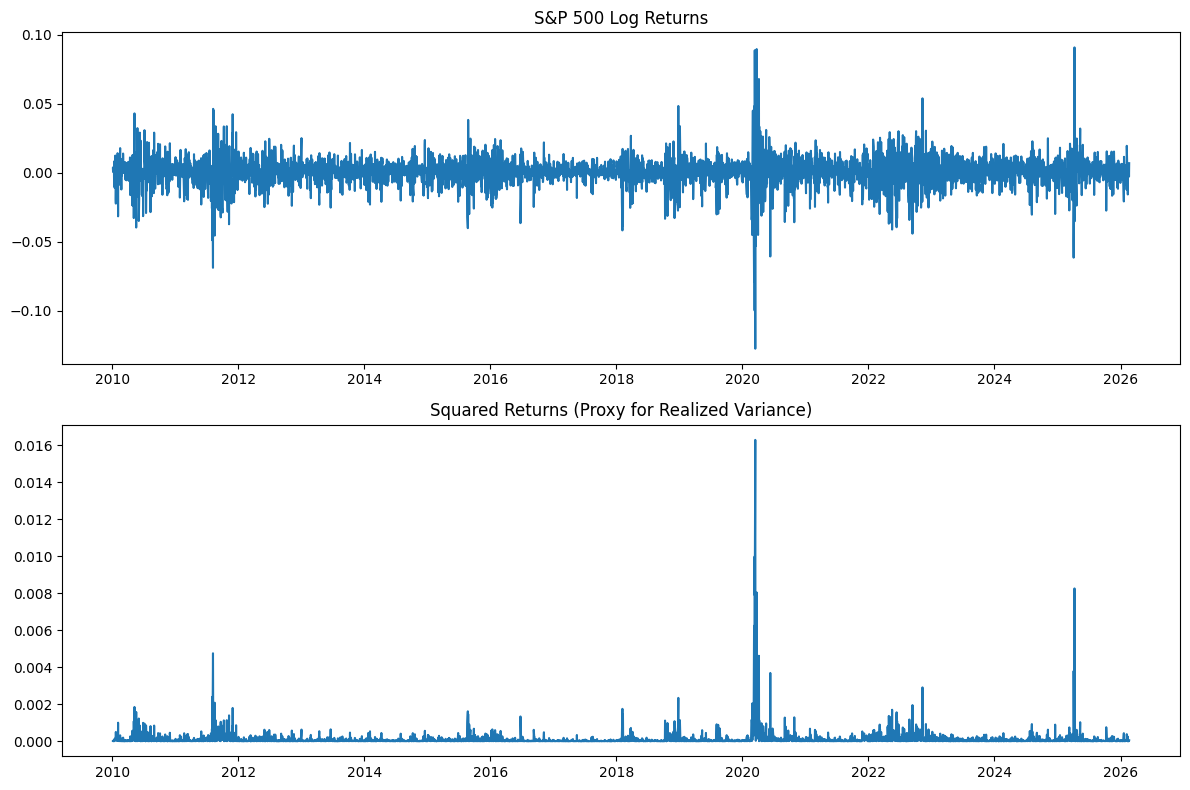

In [16]:
df["Squared_Return"] = df["SP500_LogReturn"] ** 2

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(df["Date"], df["SP500_LogReturn"])
ax[0].set_title("S&P 500 Log Returns")

ax[1].plot(df["Date"], df["Squared_Return"])
ax[1].set_title("Squared Returns (Proxy for Realized Variance)")

plt.tight_layout()
plt.show()

# Autocorrelation of Returns

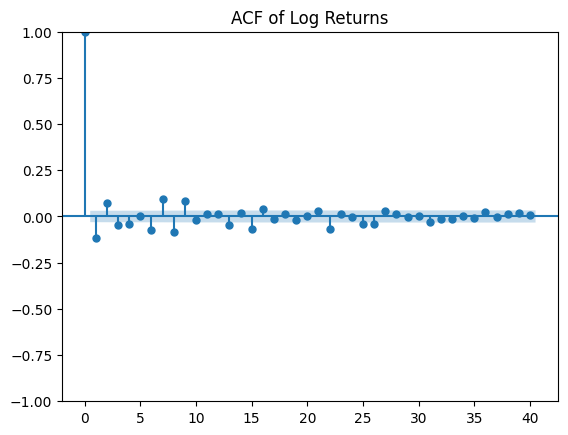

In [19]:
plot_acf(df["SP500_LogReturn"], lags=40)
plt.title("ACF of Log Returns")
plt.show()

# ACF of Squared Returns

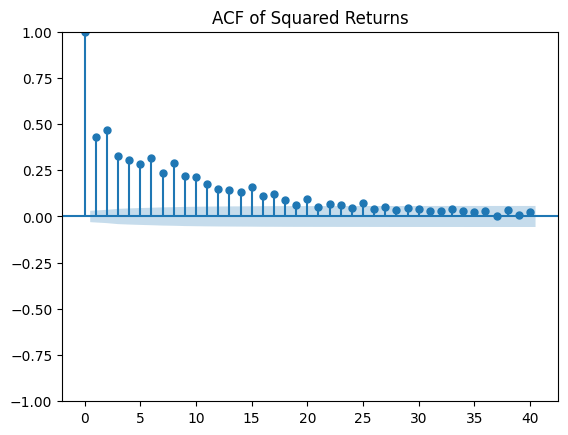

In [20]:
plot_acf(df["Squared_Return"], lags=40)
plt.title("ACF of Squared Returns")
plt.show()

# Normality Test

In [21]:
jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(df["SP500_LogReturn"])

jb_stat, jb_pvalue, skew, kurtosis

(np.float64(31403.905352554368),
 np.float64(0.0),
 np.float64(-0.6145766986380579),
 np.float64(16.574435689836115))

# Compare Realized Variance vs VIX

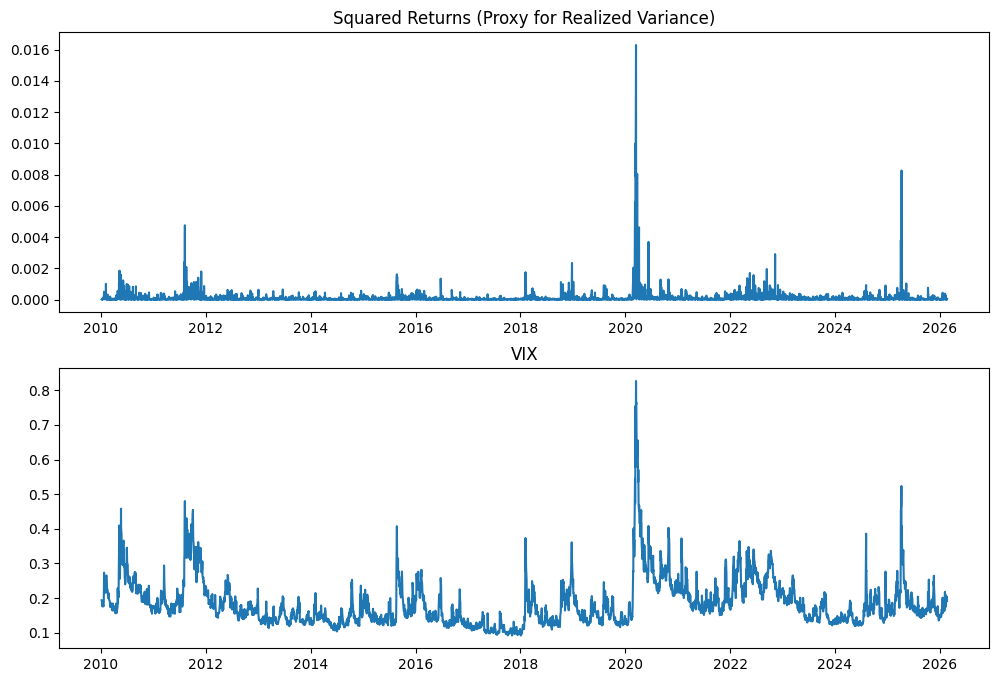

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(df["Date"], df["Squared_Return"] )
ax[0].set_title("Squared Returns (Proxy for Realized Variance)")
ax[1].plot(df["Date"], df["VIX_Close"] / 100)
ax[1].set_title("VIX")
plt.show()

# Rolling Correlation Between Realized and Implied Volatility

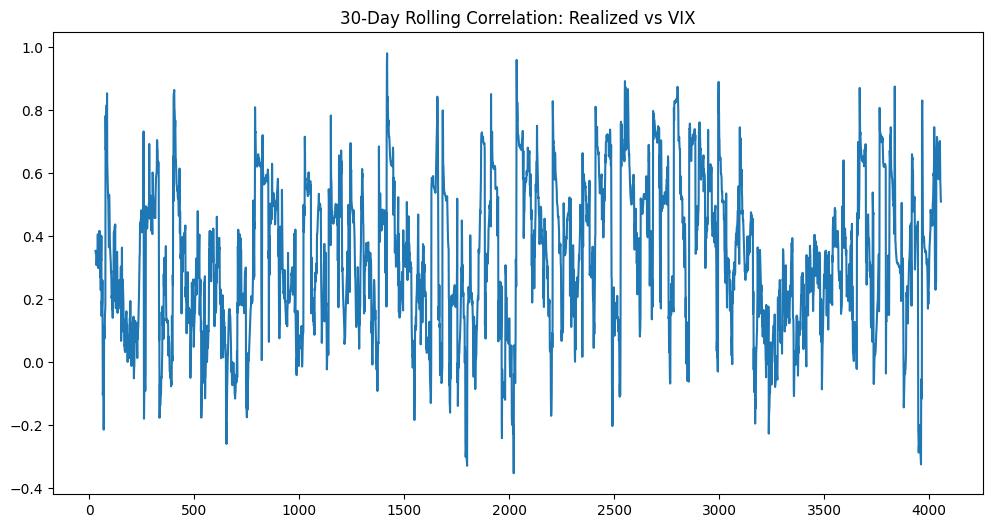

In [35]:
rolling_corr = df["Squared_Return"].rolling(30).corr(df["VIX_Close"])

plt.figure(figsize=(12, 6))
plt.plot(rolling_corr)
plt.title("30-Day Rolling Correlation: Realized vs VIX")
plt.show()